<a href="https://colab.research.google.com/github/brendenwest/ad450/blob/master/7_ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with Regression 

### Reading
- Géron - Chapters 2 & 4
- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
- https://www.inferentialthinking.com/chapters/15/Prediction.html
- https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html

(optional)
- http://greenteapress.com/thinkstats2/html/thinkstats2011.html
- http://greenteapress.com/thinkstats2/html/thinkstats2012.html (through 11.5)

### Tutorials
- https://www.datacamp.com/community/tutorials/essentials-linear-regression-python
- https://www.coursera.org/learn/ml-regression


### Learning Outcomes
- overview of linear regression
- problems suited for linear regression
- measuring feature correlations
- encoding text & categorical data
- univariate & multi-variate regression
- measuring performance of regression models
- cost functions
- optimizing with gradient descent
- cross validation


## Linear Regression Overview

Linear regression is a an important principle underlying a class of statistical algorithms called **Generalized Linear Models**. 

GLMs are used for modeline datasets with continuous numeric labels (target). That is, to predict the value of a numeric dependent variable (response) from one or more independent (feature) variables.

A linear regression model is a function that maps feature values to a numeric target (predictor):

> h(x) = $θ_{0}$ + $θ_{1}$$x_{1}$

Where $θ_{i}$’s are the function parameters (also called **coefficients** or **weights**). You may recall this from linear equations in algebra:

> y = ax + b

where b is the y intercept and a is the slope of the line.

- **Simple Linear Regression** (SLR) deals with a single independent variable 
- **Multiple-linear Regression** (MLR) deals with multiple independent variables 

> h(x) = $a_{1}$$x_{1}$ + $a_{2}$$x_{2}$ ... $a_{n}$$x_{n}$ + b

Regression models are developed to make h(x) close to y, at least for the training examples. 

- **Univariate regression** predicts a single value 
- **Multivariate regression** predicts multiple values 

- Linear regression assumes a linear relationship between dependent & independent variables. If that's not the case, data can be transformed so that a linear relationship is maintained. 
- If dataset features are very correlated to each other, linear regression fails to approximate the relationship appropriately and tends to overfit. So, it is efficient to detect the highly correlated features and to drop them before applying linear regression.


## Understanding Model Measures

Many statistical packages such as `statsmodels` will provide metrics when performaing a regression. Some key metrics are:  

- **R-Squared** - the percent of dependent variable's variance explained by the model. Doesn't tell whether a chosen model is good or bad, nor whether the data and predictions are biased.
- **coefficient (coef)** - amount the dependent variable changes if the independent variable changes by 1. For model with a single independent variable, this is the slope of the regression line.
- **95% confidence intervals** for the coefficient



### Measuring Performance

**Root Mean Square Error (RMSE)** is typically used to measure performance of a regression model, that is how much error the model makes in its predictions, with a higher weight for large errors

The **Ordinary Least Squares** (OLS) procedure seeks to minimize the sum of the squared residuals - same as Root Mean Square Error (RMSE)). This measure of model accuracy is called a **loss function**.

This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. 

RMSE performs very well and is generally preferred for measuring model accuracy but is sensitive to outliers. If outliers are not rare, other measures of error may be more appropriate.

**Least Squares Regression** - trains a model by choosing paramter (θ) values to minimize total error. Starts with an initial guess & iteratively changes θ to make J(θ) smaller, until convergence on a value of θ that minimizes J(θ).  

**Gradient descent** is a commonly used convergence algorithm that starts with some initial θ, and repeatedly updates it in the direction towards minimizing the error, using a **learning rate** for the size of the improvement step to take on each iteration.

- **batch gradient descent** looks at every example in the training set on each step.
- **stochastic (incremental) gradient descent** updates the weighting parameters according to the gradient of the error with respect to just the training example encountered

## Over & Under fitting

Anscombe's quartet is a carefully-crafted dataset with four datasets having nearly identical summary statistics.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline


# construct data set
data = [
[4,4,4,8,4.26,3.1,5.39,6.58],
[5,5,5,8,5.68,4.74,5.73,5.76],
[6,6,6,8,7.24,6.13,6.08,7.71],
[7,7,7,8,4.82,7.26,6.42,8.84],
[8,8,8,8,6.95,8.14,6.77,8.47],
[9,9,9,8,8.81,8.77,7.11,7.04],
[10,10,10,8,8.04,9.14,7.46,5.25],
[11,11,11,8,8.33,9.26,7.81,5.56],
[12,12,12,8,10.84,9.13,8.15,7.91],
[13,13,13,8,7.58,8.74,12.74,6.89],
[14,14,14,19,9.96,8.1,8.84,12.5]
]

x1 = [x[0] for x in data]
x2 = [x[1] for x in data]
x3 = [x[2] for x in data]
x4 = [x[3] for x in data]
y1 = [x[4] for x in data]
y2 = [x[5] for x in data]
y3 = [x[6] for x in data]
y4 = [x[7] for x in data]

anscombe = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4,'y1':y1,'y2':y2,'y3':y3,'y4':y4})

def plot_function_and_fit(x, y, degree):
    """
    Fit a polynomial to the data and plot both.
    """
    
    # We'll use a standard linear regression, unpenalised and unnormalised
    lm = LinearRegression()
    
    # Build a Vandermonde matrix for the degrees of x
    x_van = np.vander(x, degree+1)
    
    # Fit the model
    lm.fit(x_van, y)
    
    # Return our predictions
    y_hat = lm.predict(x_van) 
    
    # Print a few summary statistics
    print(f"Mean squared error : {np.mean((y - y_hat)**2):.3f}")
    print(f"R2 : {r2_score(y, y_hat):.3f}")

    # Plotty plot plot
    plt.scatter(x, y, alpha=0.5, s=100)
    plt.plot(x, y_hat, lw=5, c="k")

In [ ]:
np.mean(anscombe[["x1", "x2", "x3", "x4"]])

In [ ]:
np.std(anscombe[["x1", "x2", "x3", "x4"]])

In [ ]:
np.mean(anscombe[["y1", "y2", "y3", "y4"]])

In [ ]:
np.std(anscombe[["y1", "y2", "y3", "y4"]])

In [ ]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Four different relationships')
ax1.scatter(anscombe["x1"],anscombe["y1"])
ax2.scatter(anscombe["x2"],anscombe["y2"])
ax3.scatter(anscombe["x3"],anscombe["y3"])
ax4.scatter(anscombe["x4"],anscombe["y4"])


Mean squared error : 1.173
R2 : 0.687


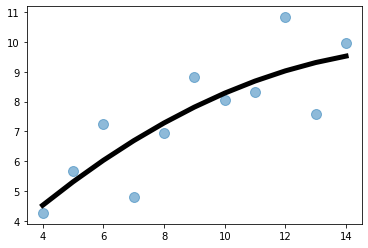

In [ ]:
plot_function_and_fit(anscombe["x1"], anscombe["y1"], 2)

Mean squared error : 0.000
R2 : 1.000


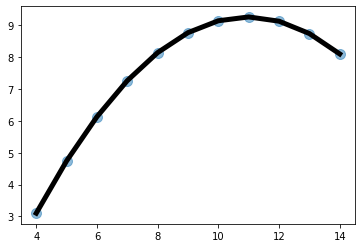

In [ ]:
plot_function_and_fit(anscombe["x2"], anscombe["y2"], 2)

Mean squared error : 1.182
R2 : 0.685


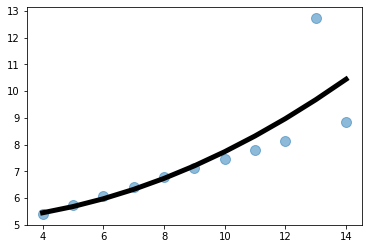

In [ ]:
plot_function_and_fit(anscombe["x3"], anscombe["y3"], 2)

Mean squared error : 1.249
R2 : 0.667


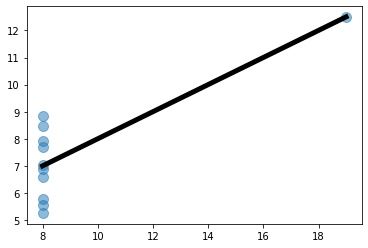

In [ ]:
plot_function_and_fit(anscombe["x4"], anscombe["y4"], 2)

## Optimization

**Gradient Descent** is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, convergence may take long. If too large, the algorithm may diverge and fail to find a good solution.

Gradient Descent computes how much the cost function will change with a small change in each model parameter. This is called a *partial derivative*. 

Instead of computing these partial derivatives individually, you can use *Batch Gradient Descent* to compute them all at once.

## Cross Validation

Prediction model performance may depend on how data was split between training and test sets, and may not correctly generalize to new data.

Cross validation (k-fold CV) is a technique to mitigate this problem.

Data set is split into multiple sets or **folds**, and training cycle is performed multiple times, with a different fold held back as a test set for each cycle.

More folds yields higher accuracy, but with increasing computational expense.


## Regularization

Large coefficients can skew the model and lead to overfitting.

Regularization is a technique to penalize large coefficients and reduce chance of overfitting.

**Ridge Regression** minimizes the loss function plus the squared sum of coefficients, multipled by some parameter value called **alpha**. 

Alpha is a **hyperparameter** that analysts choose external to the model and controls how heavily large coefficients are penalized. Too high a value can result in underfitting.

**Lasso Regression** minimizes the loss function plus the sum of absolute value of coefficients, multipled by an **alpha** parameter. 

Tends to minimize coefficients of less import features & select the more important features.
